In [ ]:
!pip install contractions
!pip install datasets
!pip install pytorch_lightning
!pip install transformers

import tensorflow as tf
import torch

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

import pandas as pd
import numpy as np

import re
import string
import math
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

import pandas as pd
import numpy as np

from tqdm.auto import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from transformers import BertTokenizerFast as BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup

import pytorch_lightning as pl
from torchmetrics.functional import accuracy, f1_score, auroc
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, multilabel_confusion_matrix

from pylab import rcParams
from matplotlib import rc
import seaborn as sns
import matplotlib.pyplot as plt
import os



%matplotlib inline
%config InlineBackend.figure_format='retina'

     |████████████████████████████████| 106 kB 5.7 MB/s 
     |████████████████████████████████| 287 kB 30.1 MB/s 
     |████████████████████████████████| 325 kB 4.3 MB/s 
     |████████████████████████████████| 212 kB 46.6 MB/s 
     |████████████████████████████████| 1.1 MB 45.0 MB/s 
     |████████████████████████████████| 136 kB 39.5 MB/s 
     |████████████████████████████████| 77 kB 5.5 MB/s 
     |████████████████████████████████| 127 kB 43.4 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
     |████████████████████████████████| 144 kB 19.2 MB/s 
     |████████████████████████████████| 271 kB 40.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium

In [ ]:
def preprocess(text):
  text= text. replace("\n"," ")
  text=contractions.fix(text) # expanding the contractions
  text=text.lower() # lowering the text
  text=re.sub(r'[^\w\s]', '', text) # removing the punctuation
  text=''.join([i for i in text if not i.isdigit()]) # removing the digits and words containing the digits
  text=" ".join([word for word in str(text).split() if word not in stop_words]) # removing the stopwords
  text=" ".join([lemmatizer.lemmatize(word) for word in text.split()]) # lemmatizing the words

  return text



In [ ]:
a="You should know women's \n sports are a joke"


In [ ]:
print(preprocess(a))

know woman sport joke


In [ ]:
# !pip install datasets

In [ ]:
# from datasets import load_dataset

# dataset = load_dataset("ethos", "multilabel")

In [ ]:
# dataset


In [ ]:
# df=pd.DataFrame(data=dataset)
# df1=[]
# for i in df['train']:
#     df1.append(i)

# df=pd.DataFrame(df1)
# df

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/train.csv')

In [ ]:
# df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
# df['comment_text']=df['comment_text'].apply(lambda x: preprocess(x))
# df

In [ ]:
df=df.drop('id',axis=1)
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
df=df.rename(columns=({'comment_text':"text"}))
df

,text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
target_columns = list(df.columns.drop(['text']))
target_columns

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
df[target_columns].sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

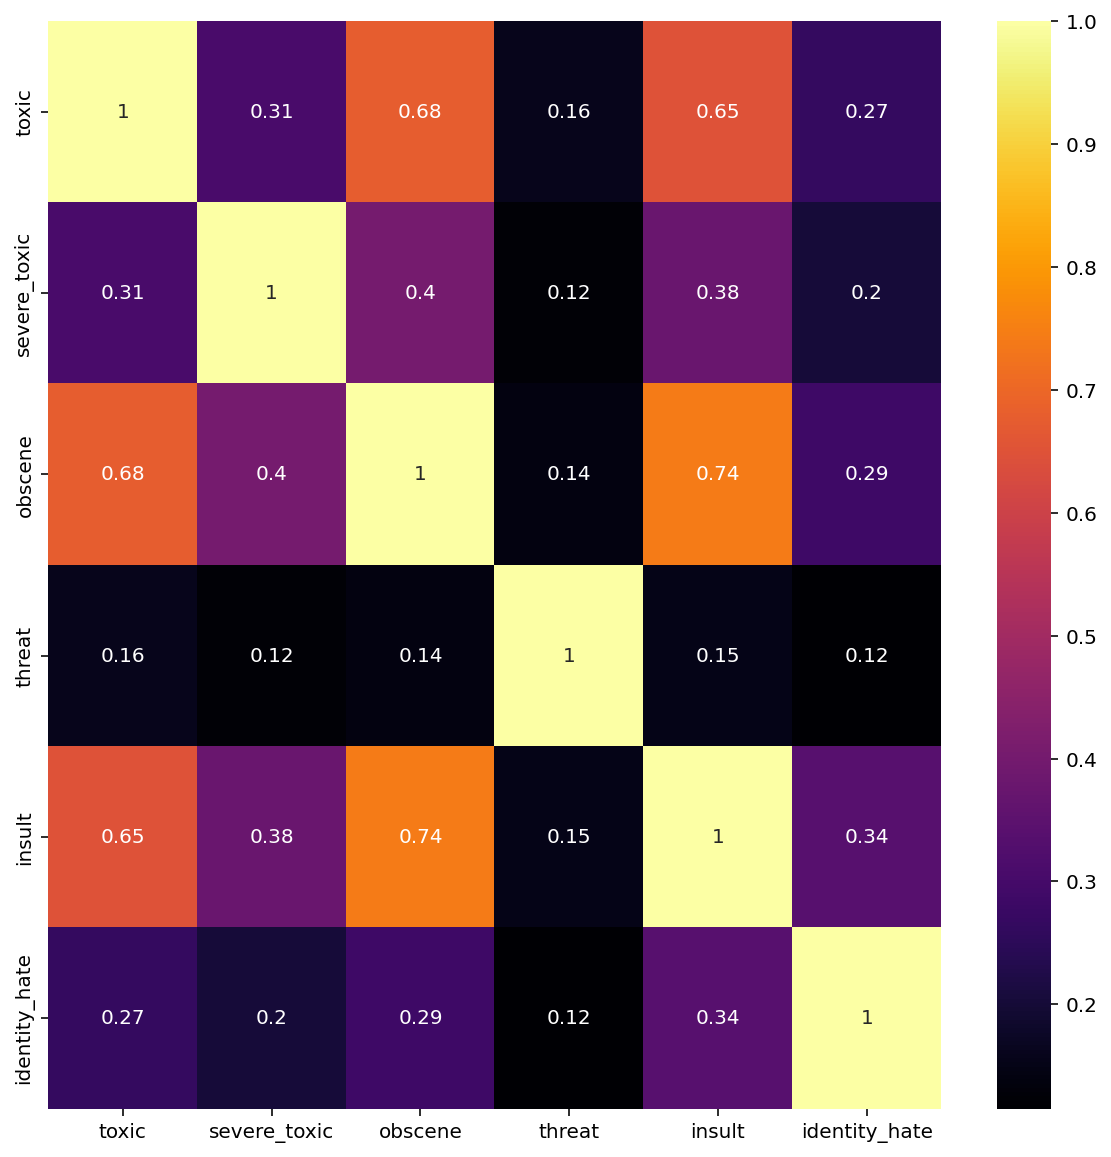

In [ ]:
# Visualise any correlations between labels:
# It seems there are some strong correlations between labels
heatmap_data = df[target_columns]
plt.figure(figsize=(10, 10))
ax = sns.heatmap(heatmap_data.corr(), cmap='inferno', annot=True)
ax.tick_params(labelsize=10)

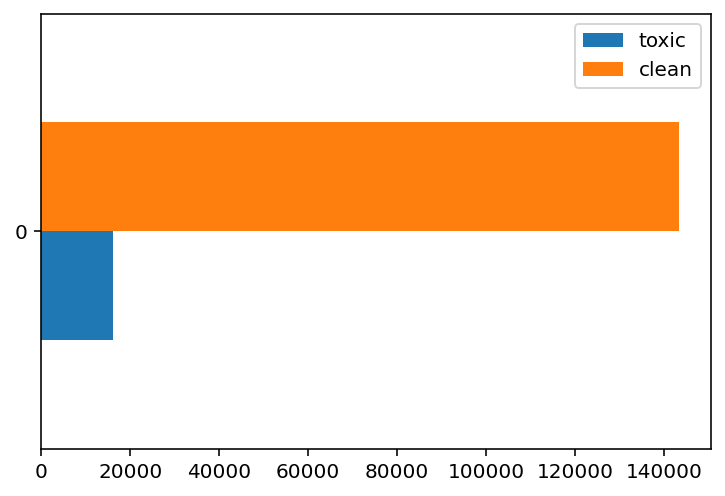

In [ ]:
LABEL_COLUMNS = df.columns.tolist()[1:]
df_toxic = df[df[LABEL_COLUMNS].sum(axis=1) > 0]
df_clean = df[df[LABEL_COLUMNS].sum(axis=1) == 0]

pd.DataFrame(dict(
  toxic=[len(df_toxic)], 
  clean=[len(df_clean)]
)).plot(kind='barh');

In [ ]:
df_clean

,text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
df_clean=df_clean[:8000]

In [ ]:
df_clean

,text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
8929,"""\nThis isn't """"based off of"""" a Cure song. So...",0,0,0,0,0,0
8930,and the largest - the 1996 swing was smaller t...,0,0,0,0,0,0
8931,November 2008 \n\nThank you for experimenting ...,0,0,0,0,0,0
8932,"Many thanks, Jack. So soothing and refreshing!",0,0,0,0,0,0


In [ ]:
df_toxic=df_toxic[:8000]

In [ ]:
# df=pd.concat([df, df_clean, df_clean]).drop_duplicates(keep=False)

In [ ]:
df = df_toxic.append(df_clean, ignore_index=True)

In [ ]:
df['text']=df['text'].apply(lambda x: preprocess(x))
df

,text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,cocksucker piss around work,1,1,1,0,1,0
1,hey talk exclusive group wp talibanswho good d...,1,0,0,0,0,0
2,bye look come think comming back tosser,1,0,0,0,0,0
3,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1
4,fuck filthy mother as dry,1,0,1,0,1,0
...,...,...,...,...,...,...,...
15995,based cure song sometimes band compared stylis...,0,0,0,0,0,0
15996,largest swing smaller one three orderinchaos,0,0,0,0,0,0
15997,november thank experimenting wikipedia test wo...,0,0,0,0,0,0
15998,many thanks jack soothing refreshing,0,0,0,0,0,0


In [ ]:
# from sklearn.model_selection import train_test_split
# train_df, test_df = train_test_split(df, test_size=0.2,random_state=19)

In [ ]:
# train_df

In [ ]:
# test_df

In [ ]:

# train_df.shape,test_df.shape

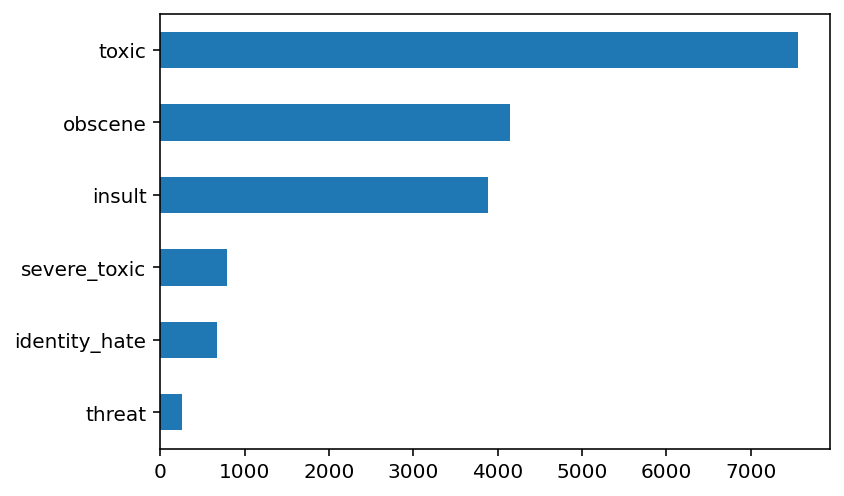

In [ ]:
LABEL_COLUMNS = df.columns.tolist()[1:]
df[LABEL_COLUMNS].sum().sort_values().plot(kind="barh");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


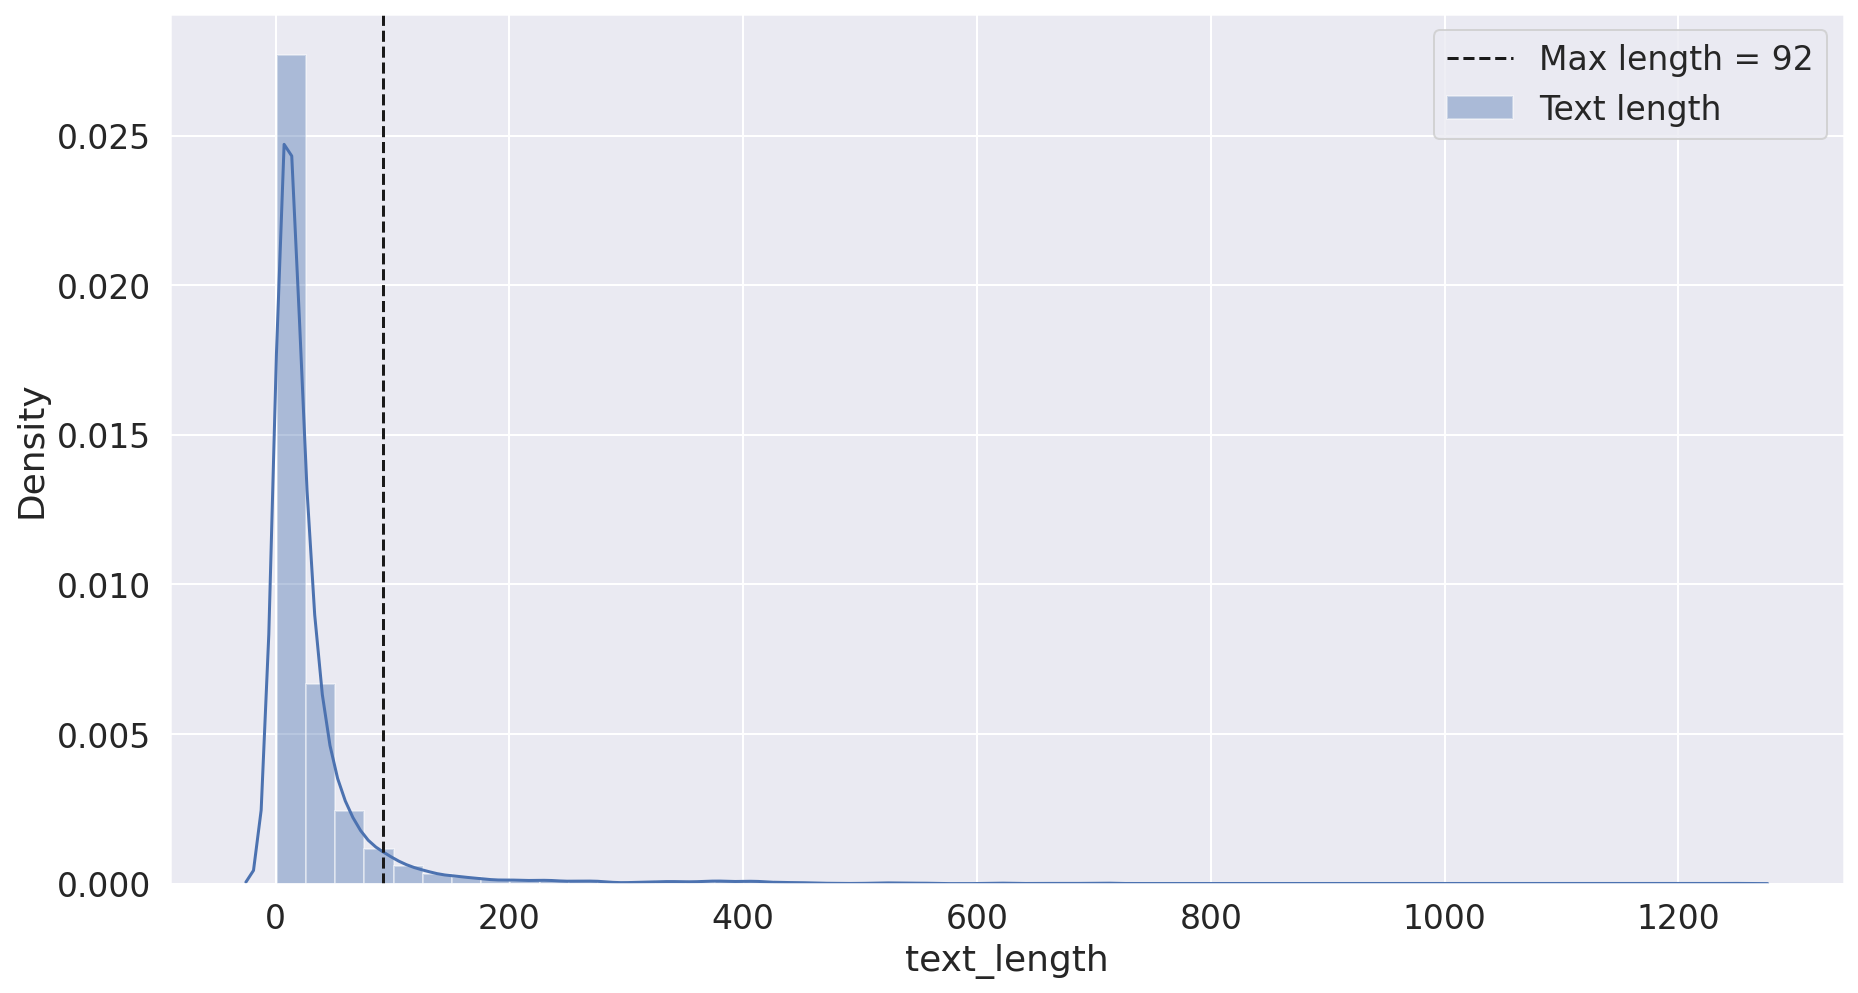

In [ ]:
df["text_length"] = df["text"].apply(lambda words: len(words.split(" ")))
max_seq_len = np.round(df["text_length"].mean() + df["text_length"].std()).astype(int)

plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.distplot(df["text_length"], hist=True, kde=True, color='b', label='Text length')
label = 'Max length = {}'.format(max_seq_len)
plt.axvline(x=max_seq_len, color='k', linestyle='--', label=label)
plt.legend()
plt.show()

#free space
del df["text_length"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


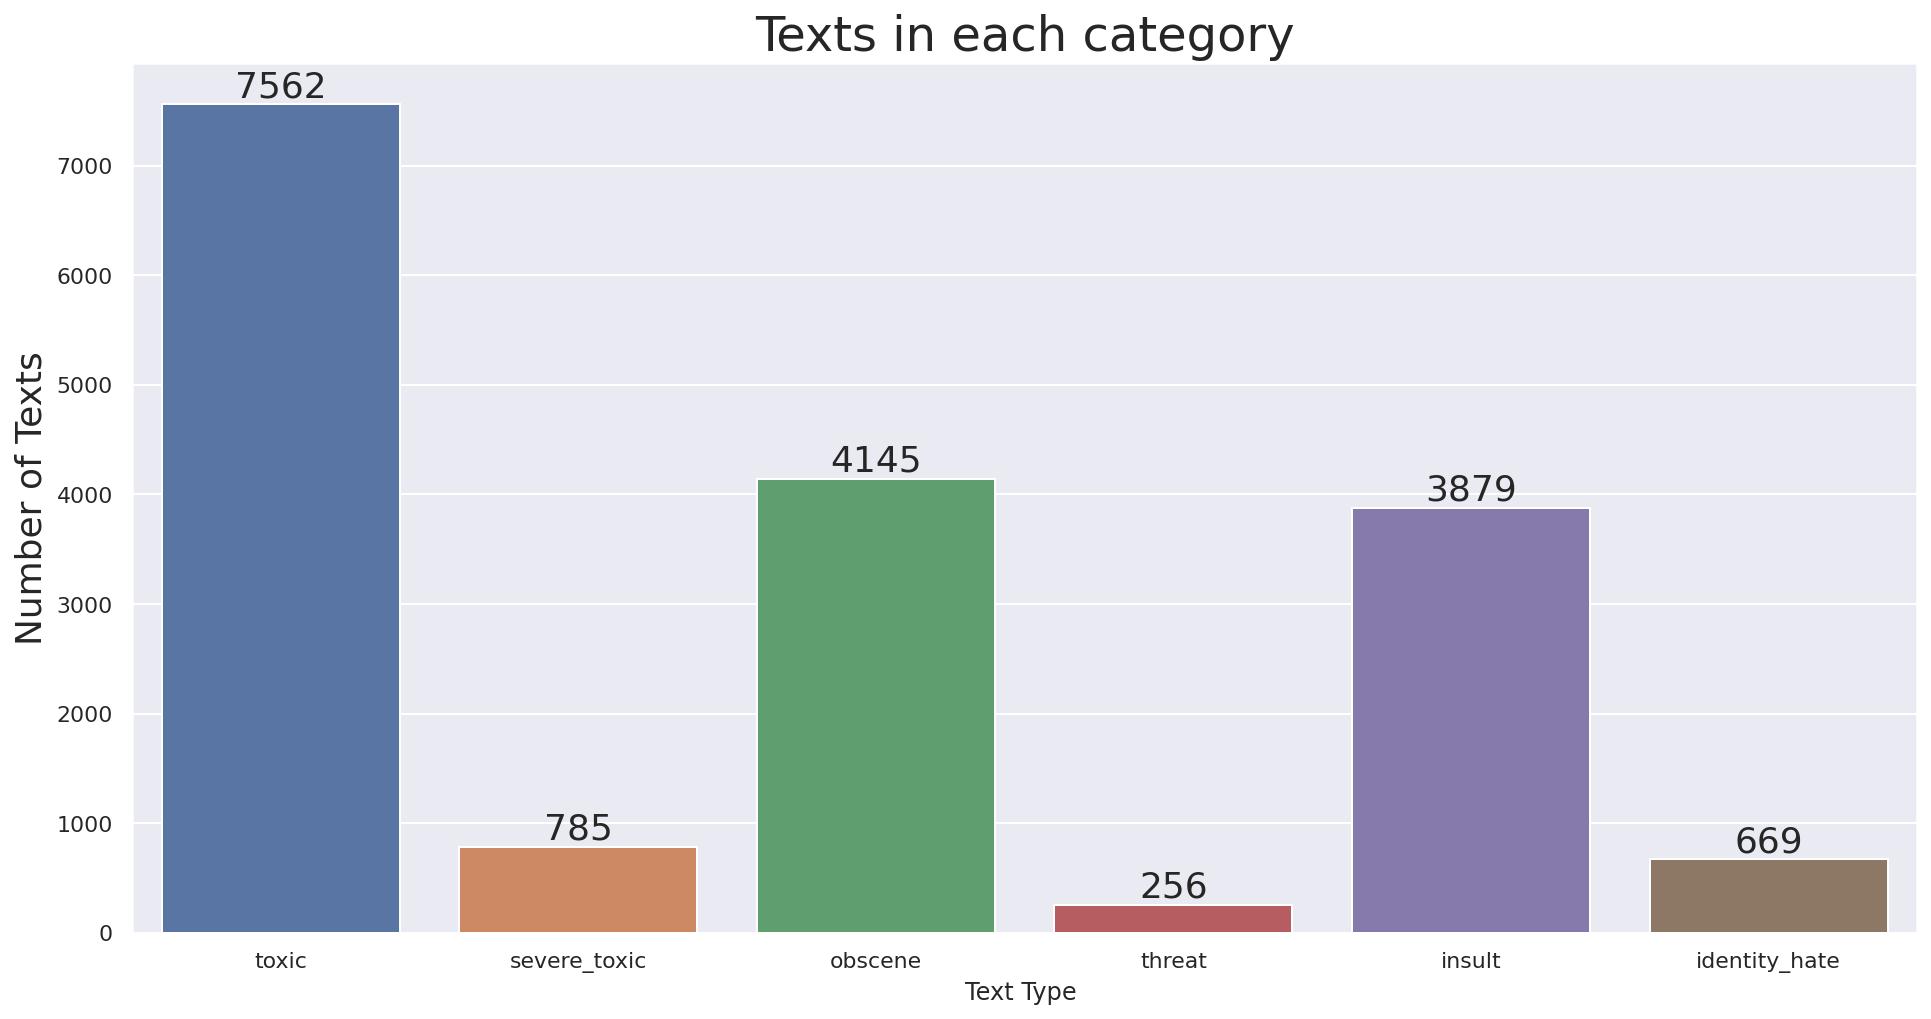

In [ ]:
list_classes = list(df.columns[1:].values)
num_classes = len(list_classes)
y_train = df[list_classes].to_numpy()
distrib_classes = df[list_classes].sum(axis=0)

#visualize classes distribution
plt.figure(figsize=(16,8))
sns.set(font_scale = 1.0)
ax= sns.barplot(list_classes, distrib_classes)

plt.title("Texts in each category", fontsize=24)
plt.ylabel('Number of Texts', fontsize=18)
plt.xlabel('Text Type ', fontsize=12)

#add the count above:
rects = ax.patches
for rect, distrib_classe in zip(rects, distrib_classes):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, distrib_classe, ha='center', va='bottom', fontsize=18)

plt.show()

In [ ]:
# from keras.datasets import reuters
# (X_train,y_train),(X_test,y_test) = reuters.load_data()

In [ ]:
# X_train

In [ ]:
# print(X_train.shape)

# print(X_test.shape)

In [ ]:
df

,text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,cocksucker piss around work,1,1,1,0,1,0
1,hey talk exclusive group wp talibanswho good d...,1,0,0,0,0,0
2,bye look come think comming back tosser,1,0,0,0,0,0
3,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1
4,fuck filthy mother as dry,1,0,1,0,1,0
...,...,...,...,...,...,...,...
15995,based cure song sometimes band compared stylis...,0,0,0,0,0,0
15996,largest swing smaller one three orderinchaos,0,0,0,0,0,0
15997,november thank experimenting wikipedia test wo...,0,0,0,0,0,0
15998,many thanks jack soothing refreshing,0,0,0,0,0,0


### **Filling text on a single tokenizer object**

In [ ]:
from keras import layers
text_vectorizer = layers.TextVectorization(
    max_tokens=100, ngrams=2, output_mode="tf_idf",pad_to_max_tokens=True
)

In [ ]:
df_array=df['text'].to_numpy()
df_array[:5]

array(['cocksucker piss around work',
       'hey talk exclusive group wp talibanswho good destroying selfappointed purist gang one asks question antisocial destructive noncontribution wp ask sityush clean behavior issue nonsensical warning',
       'bye look come think comming back tosser',
       'gay antisemmitian archangel white tiger meow greetingshhh uh two way erased comment ww holocaust brutally slaying jew gaysgypsysslavsanyone antisemitian shave head bald go skinhead meeting doubt word bible homosexuality deadly sin make pentagram tatoo forehead go satanistic mass gay pal first last warning fucking gay appreciate nazi shwain would write page wish talk anymore beware dark side',
       'fuck filthy mother as dry'], dtype=object)

### **Train data encoding texts using single tokenizer**

In [ ]:
from keras.preprocessing.text import Tokenizer
tok_all=Tokenizer(char_level=False)
tok_all.fit_on_texts(df_array)

In [ ]:
vocabulary_all=len(tok_all.word_counts)
print(vocabulary_all)

43916


In [ ]:
encoded=tok_all.texts_to_sequences(df_array)
print(df_array[0])
encoded[0]

cocksucker piss around work


[359, 942, 200, 62]

In [ ]:
print(df_array[1])
encoded[1]

hey talk exclusive group wp talibanswho good destroying selfappointed purist gang one asks question antisocial destructive noncontribution wp ask sityush clean behavior issue nonsensical warning


[202,
 9,
 3260,
 313,
 569,
 19099,
 38,
 3520,
 7441,
 12904,
 2071,
 7,
 4555,
 96,
 7442,
 4825,
 19100,
 569,
 186,
 19101,
 1268,
 888,
 149,
 4556,
 206]

### **Train data padding texts into equal size**

In [ ]:
from keras.preprocessing import sequence
max_length=100
padded_data=sequence.pad_sequences(encoded,max_length,padding='post')

In [ ]:
padded_data.shape

(16000, 100)

In [ ]:
padded_data[0]

array([359, 942, 200,  62,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [ ]:
class ToxicCommentsDataset(Dataset):

  def __init__(
    self, 
    data: pd.DataFrame, 
    # tokenizer: BertTokenizer, 
    # max_token_len: int = 128
  ):
    # self.tokenizer = tokenizer
    self.data = data
    # self.max_token_len = max_token_len
    
  def __len__(self):
    return len(self.data)

  def __getitem__(self, index: int):
    data_row = self.data.iloc[index]

    text = data_row.text
    labels = data_row[LABEL_COLUMNS]

    # encoding = self.tokenizer.encode_plus(
    #   text,
    #   add_special_tokens=True,
    #   max_length=self.max_token_len,
    #   return_token_type_ids=False,
    #   padding="max_length",
    #   truncation=True,
    #   return_attention_mask=True,
    #   return_tensors='pt',
    # )

    return dict(
      Text=text,
      # input_ids=encoding["input_ids"].flatten(),
      # attention_mask=encoding["attention_mask"].flatten(),
      labels=np.asarray(labels)
    )

In [ ]:
dataset = ToxicCommentsDataset(df)

dataset[0]

{'Text': 'cocksucker piss around work',
 'labels': array([1, 1, 1, 0, 1, 0], dtype=object)}

In [ ]:
y=[]
for ind in range(len(df)):
  sample_data=dataset[ind]
  # train_input_id_tensors.append(sample_data['input_ids'])
  # train_attention_mask_tensor.append(sample_data['attention_mask'])
  y.append(sample_data['labels'])
  # print(ind)
  # print('Input Id: ',sample_data['input_ids'])
  # print('Attentionmask: ',sample_data['attention_mask'])
  # print('\n====================================\n')
# train_input_id_tensors = torch.Tensor([t.size() for t in train_input_id_tensors]).to(torch.int64)
# train_attention_mask_tensor=torch.Tensor([t.size() for t in train_attention_mask_tensor]).to(torch.int64)
# y_train=torch.Tensor([t.size() for t in y_train]).to(torch.int64)

In [ ]:
y=np.asarray(y).astype(np.float32)
X=padded_data.astype(float)

In [ ]:
X

array([[ 359.,  942.,  200., ...,    0.,    0.,    0.],
       [ 202.,    9., 3260., ...,    0.,    0.,    0.],
       [1579.,   61.,   71., ...,    0.,    0.,    0.],
       ...,
       [1342.,  118., 1907., ...,    0.,    0.,    0.],
       [  85.,   46., 1595., ...,    0.,    0.,    0.],
       [ 190.,   83., 2534., ..., 3124., 6388., 5040.]])

In [ ]:
X.shape,y.shape

((16000, 100), (16000, 6))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=19)

In [ ]:
x_train.shape,y_train.shape

((12800, 100), (12800, 6))

In [ ]:
x_test.shape,y_test.shape

((3200, 100), (3200, 6))

In [ ]:
x_train=np.reshape(x_train,(12800,-1,100))
x_test=np.reshape(x_test,(3200,-1,100))

In [ ]:
y_train[0]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
model = Sequential()
model.add(LSTM(256,input_dim=100,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))



In [ ]:


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               365568    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 407,110
Trainable params: 407,110
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
400/400 [==============================] - 6s 6ms/step - loss: 26472.1367 - accuracy: 0.3859 - val_loss: 232212.4531 - val_accuracy: 0.0159
Epoch 2/10
400/400 [==============================] - 2s 6ms/step - loss: 1556481.8750 - accuracy: 0.3825 - val_loss: 4125875.7500 - val_accuracy: 0.9731
Epoch 3/10
400/400 [==============================] - 2s 5ms/step - loss: 10173291.0000 - accuracy: 0.3921 - val_loss: 9694200.0000 - val_accuracy: 0.0091
Epoch 4/10
400/400 [==============================] - 2s 5ms/step - loss: 34998368.0000 - accuracy: 0.3904 - val_loss: 59141188.0000 - val_accuracy: 0.0159
Epoch 5/10
400/400 [==============================] - 2s 5ms/step - loss: 79474000.0000 - accuracy: 0.3795 - val_loss: 89332744.0000 - val_accuracy: 0.0159
Epoch 6/10
400/400 [==============================] - 2s 5ms/step - loss: 142192736.0000 - accuracy: 0.3816 - val_loss: 219816880.0000 - val_accuracy: 0.9731
Epoch 7/10
400/400 [==============================] - 2s 5ms/step - lo

In [ ]:
# x_test[0]

array([[1.2900e+02, 1.0200e+02, 2.1800e+03, 1.1000e+02, 1.2030e+03,
        9.2930e+03, 7.7000e+01, 1.2050e+03, 1.1400e+02, 8.9980e+03,
        3.0017e+04, 7.0900e+03, 3.0018e+04, 1.3431e+04, 3.0019e+04,
        4.8000e+01, 6.9000e+02, 1.4830e+03, 4.6700e+02, 1.0000e+01,
        7.7220e+03, 3.0020e+04, 3.0021e+04, 7.0000e+00, 2.3000e+01,
        2.3900e+02, 4.8200e+02, 7.3050e+03, 1.1944e+04, 1.6800e+02,
        3.0800e+02, 2.5800e+02, 1.6830e+03, 3.2800e+03, 1.5500e+02,
        3.2800e+03, 8.1430e+03, 7.3050e+03, 1.1944e+04, 3.0022e+04,
        2.3720e+03, 3.0023e+04, 3.2800e+03, 1.1700e+02, 1.8400e+03,
        3.9260e+03, 2.4780e+03, 6.1000e+01, 3.0024e+04, 7.3050e+03,
        1.1944e+04, 1.0000e+00, 7.7000e+01, 1.2050e+03, 1.1400e+02,
        2.9000e+02, 1.0880e+03, 3.0025e+04, 3.0026e+04, 4.7030e+03,
        1.0880e+03, 5.4600e+02, 5.4600e+02, 7.2700e+02, 3.2000e+01,
        2.9000e+02, 1.4200e+02, 1.9720e+03, 4.8000e+01, 5.3910e+03,
        1.3980e+03, 6.9400e+02, 3.0027e+04, 1.54

In [ ]:
# x_test[0]=np.reshape(x_test[0],(1,-1,100))


In [ ]:
# model.predict

In [1]:
# type(padded_test_data)

In [2]:
# type(y_test)

In [3]:
# padded_train_data.shape,y_train.shape

In [4]:
# padded_test_data.shape,y_test.shape

In [5]:
# padded_train_data=np.reshape(padded_train_data,(3200,-1,100))
# padded_test_data=np.reshape(padded_test_data,(3200,-1,100))

In [6]:
# padded_train_data.shape,padded_test_data.shape

In [7]:
# import numpy as np
# from keras.preprocessing import sequence
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [8]:
# model = Sequential()
# model.add(LSTM(256,input_dim=100,activation='relu'))
# model.add(Dense(128,activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(6, activation='sigmoid'))



In [9]:
# model.summary()

In [10]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
# model.fit(padded_train_data,y_train,epochs=10,validation_data=(padded_test_data,y_test))

In [12]:
# #Saving the model
# model_json=model.to_json()
# with open("kaggle_dataset_model2.json","w") as json_file:
#     json_file.write(model_json)
#     #serializing weights to HDF5
# model.save_weights("kaggle_dataset_model2.h5")

In [13]:
# model.predict(test_text)